In [100]:
# Importing our dataset and some necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv('C:\\Users\\Aayush Kandpal\\Downloads\\P16-Self-Organizing-Maps\\Self_Organizing_Maps\\Credit_Card_Applications.csv')

In [2]:
dataset
# This dataset has the bank data of 690. The last column that is column 'Class' tells us weather the user comitted fraud or not.
# 0 represents that no fraud was comitted while 1 says that fraud was committed

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [3]:
# Checking for missing values
dataset.count()

CustomerID    690
A1            690
A2            690
A3            690
A4            690
A5            690
A6            690
A7            690
A8            690
A9            690
A10           690
A11           690
A12           690
A13           690
A14           690
Class         690
dtype: int64

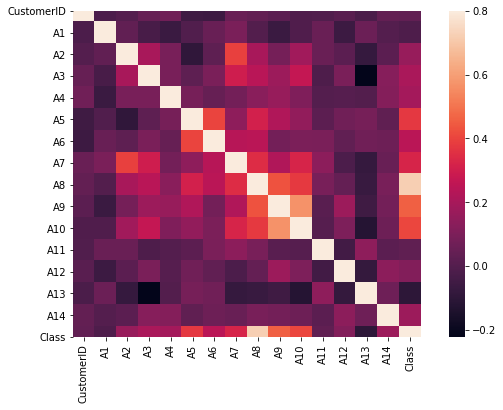

In [101]:
# plotting a correlation matrix for our dataset 
matrix=dataset.corr()
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(matrix,vmax=0.8,square=True)

In [4]:
# Splitting our data intot test and train. In total we have bank details of 690 users out of which we will train our Artificial 
 # Network on 80% data and 20 % data we will test our networks accuracy
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [5]:
# Feature scaling so that one feature does not have greater weight on the results
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
xtrain=sc.fit_transform(x_train)
xtest=sc.transform(x_test)


In [6]:
# Importing some libraries to buikd our ANN
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [78]:
# Adding the input layer and the first hidden layer with dropout
# Take average of input + output for units/output_dim param in Dense
# input_dim is necessary for the first layer as it was just initialized
classifier=Sequential()
classifier.add(Dense(8, input_dim = 15, kernel_initializer = 'uniform', activation = 'relu' ))
classifier.add(Dropout( 0.2))
classifier.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu' ))
classifier.add(Dropout( 0.2))
classifier.add(Dense(8, kernel_initializer = 'uniform', activation = 'relu' ))
classifier.add(Dropout( 0.2))
classifier.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu' ))
classifier.add(Dropout( 0.2))

classifier.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid' ))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training Set
# x_train, y_train, Batch size, Epochs (whole training set)
classifier.fit(xtrain, y_train, batch_size = 12, epochs = 10)


Epoch 1/10
46/46 [==============================] - 0s 781us/step - loss: 0.6924 - accuracy: 0.5598
Epoch 2/10
46/46 [==============================] - 0s 846us/step - loss: 0.6914 - accuracy: 0.5616
Epoch 3/10
46/46 [==============================] - 0s 824us/step - loss: 0.6903 - accuracy: 0.5616
Epoch 4/10
46/46 [==============================] - 0s 911us/step - loss: 0.6879 - accuracy: 0.5616
Epoch 5/10
46/46 [==============================] - 0s 846us/step - loss: 0.6749 - accuracy: 0.5616
Epoch 6/10
46/46 [==============================] - 0s 954us/step - loss: 0.6242 - accuracy: 0.7319
Epoch 7/10
46/46 [==============================] - 0s 824us/step - loss: 0.5282 - accuracy: 0.8007
Epoch 8/10
46/46 [==============================] - 0s 954us/step - loss: 0.4501 - accuracy: 0.8370
Epoch 9/10
46/46 [==============================] - 0s 933us/step - loss: 0.4481 - accuracy: 0.8351
Epoch 10/10
46/46 [==============================] - 0s 868us/step - loss: 0.4315 - accuracy: 0.8315

In [80]:
# Predicting the Test set results
# Note that the output we have got are the probabilities of potential fraud 
# Any probability greater than 50 percent or 0.5 will be considered as 1 and the less than that will be converted to 0
y_pred = classifier.predict(xtest)
y_pred = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


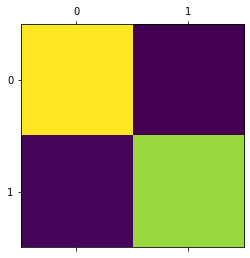

array([[66,  7],
       [ 8, 57]], dtype=int64)

In [93]:
# Plotting our confusion matrix
plt.matshow(cm)
plt.show() 
cm
# See the array below for better understanding 

In [96]:
 # As you can see we were successfully able to predict fraud with almost 90 percent accuracy, which is a pretty good result.
    # Upvote if you liked this Artificial neural network model
from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test,y_pred))

Accuracy Score: 0.8913043478260869


In [97]:
# We have achieved a good precison, recall and f1 score with our model
# Thanks
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        73
           1       0.89      0.88      0.88        65

    accuracy                           0.89       138
   macro avg       0.89      0.89      0.89       138
weighted avg       0.89      0.89      0.89       138



In [ ]:
 # Hence we have obtained an accuracy of about 90 percent in successfully predicting Credit card fraud based on bank details.